In [2]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\PS_20174392719_1491204439457_log.csv")

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
print(df.shape)

(6362620, 11)


In [6]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [7]:
print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


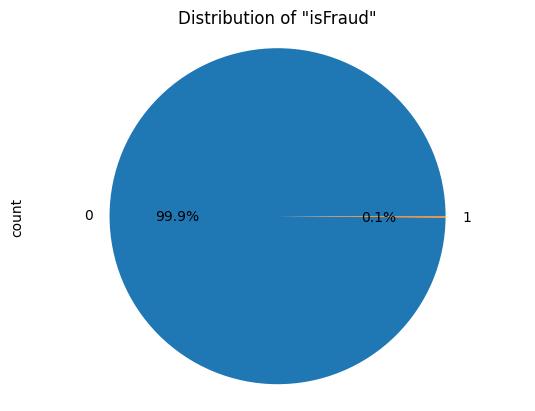

In [8]:
df['isFraud'].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of "isFraud"')
plt.show()

In [9]:
print(df['type'].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [10]:
le=LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

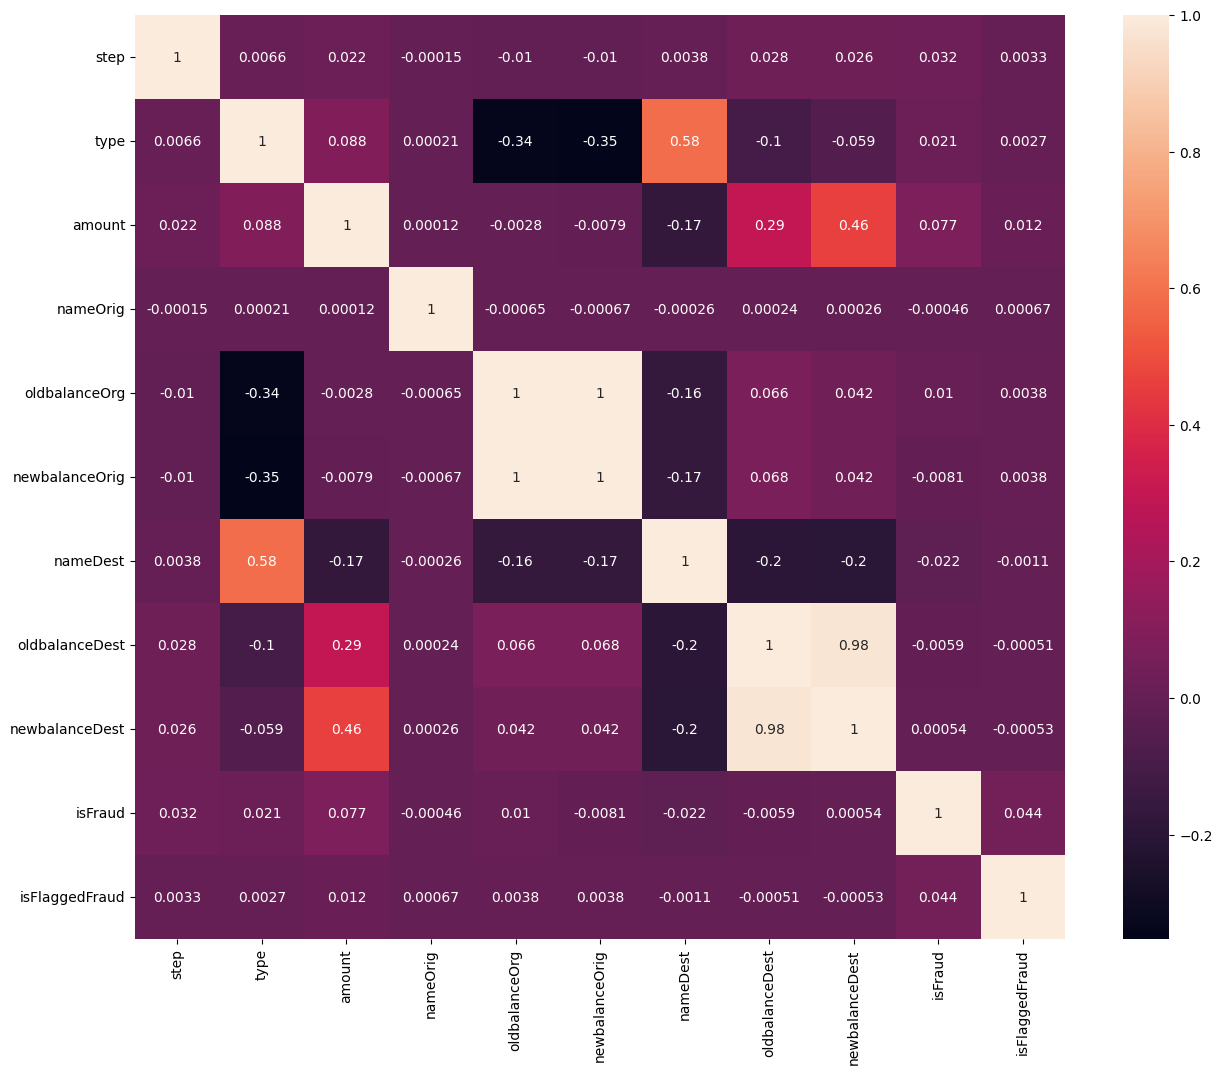

In [11]:
corr_mtrix = df.corr()
f, ax = plt.subplots(figsize=(15,12))
sn.heatmap(corr_mtrix, annot=True, annot_kws={"size":10})
plt.show()

In [12]:
if 'nameOrig' in df.columns and 'nameDest' in df.columns:
    df.drop(columns=["nameOrig", "nameDest"], inplace=True)

In [13]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = DecisionTreeClassifier(random_state=42)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [19]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.91


In [20]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

F1-score: 0.89


In [21]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.88


In [22]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1270758     146]
 [    200    1420]]


In [23]:
feature_names = X.columns.tolist()

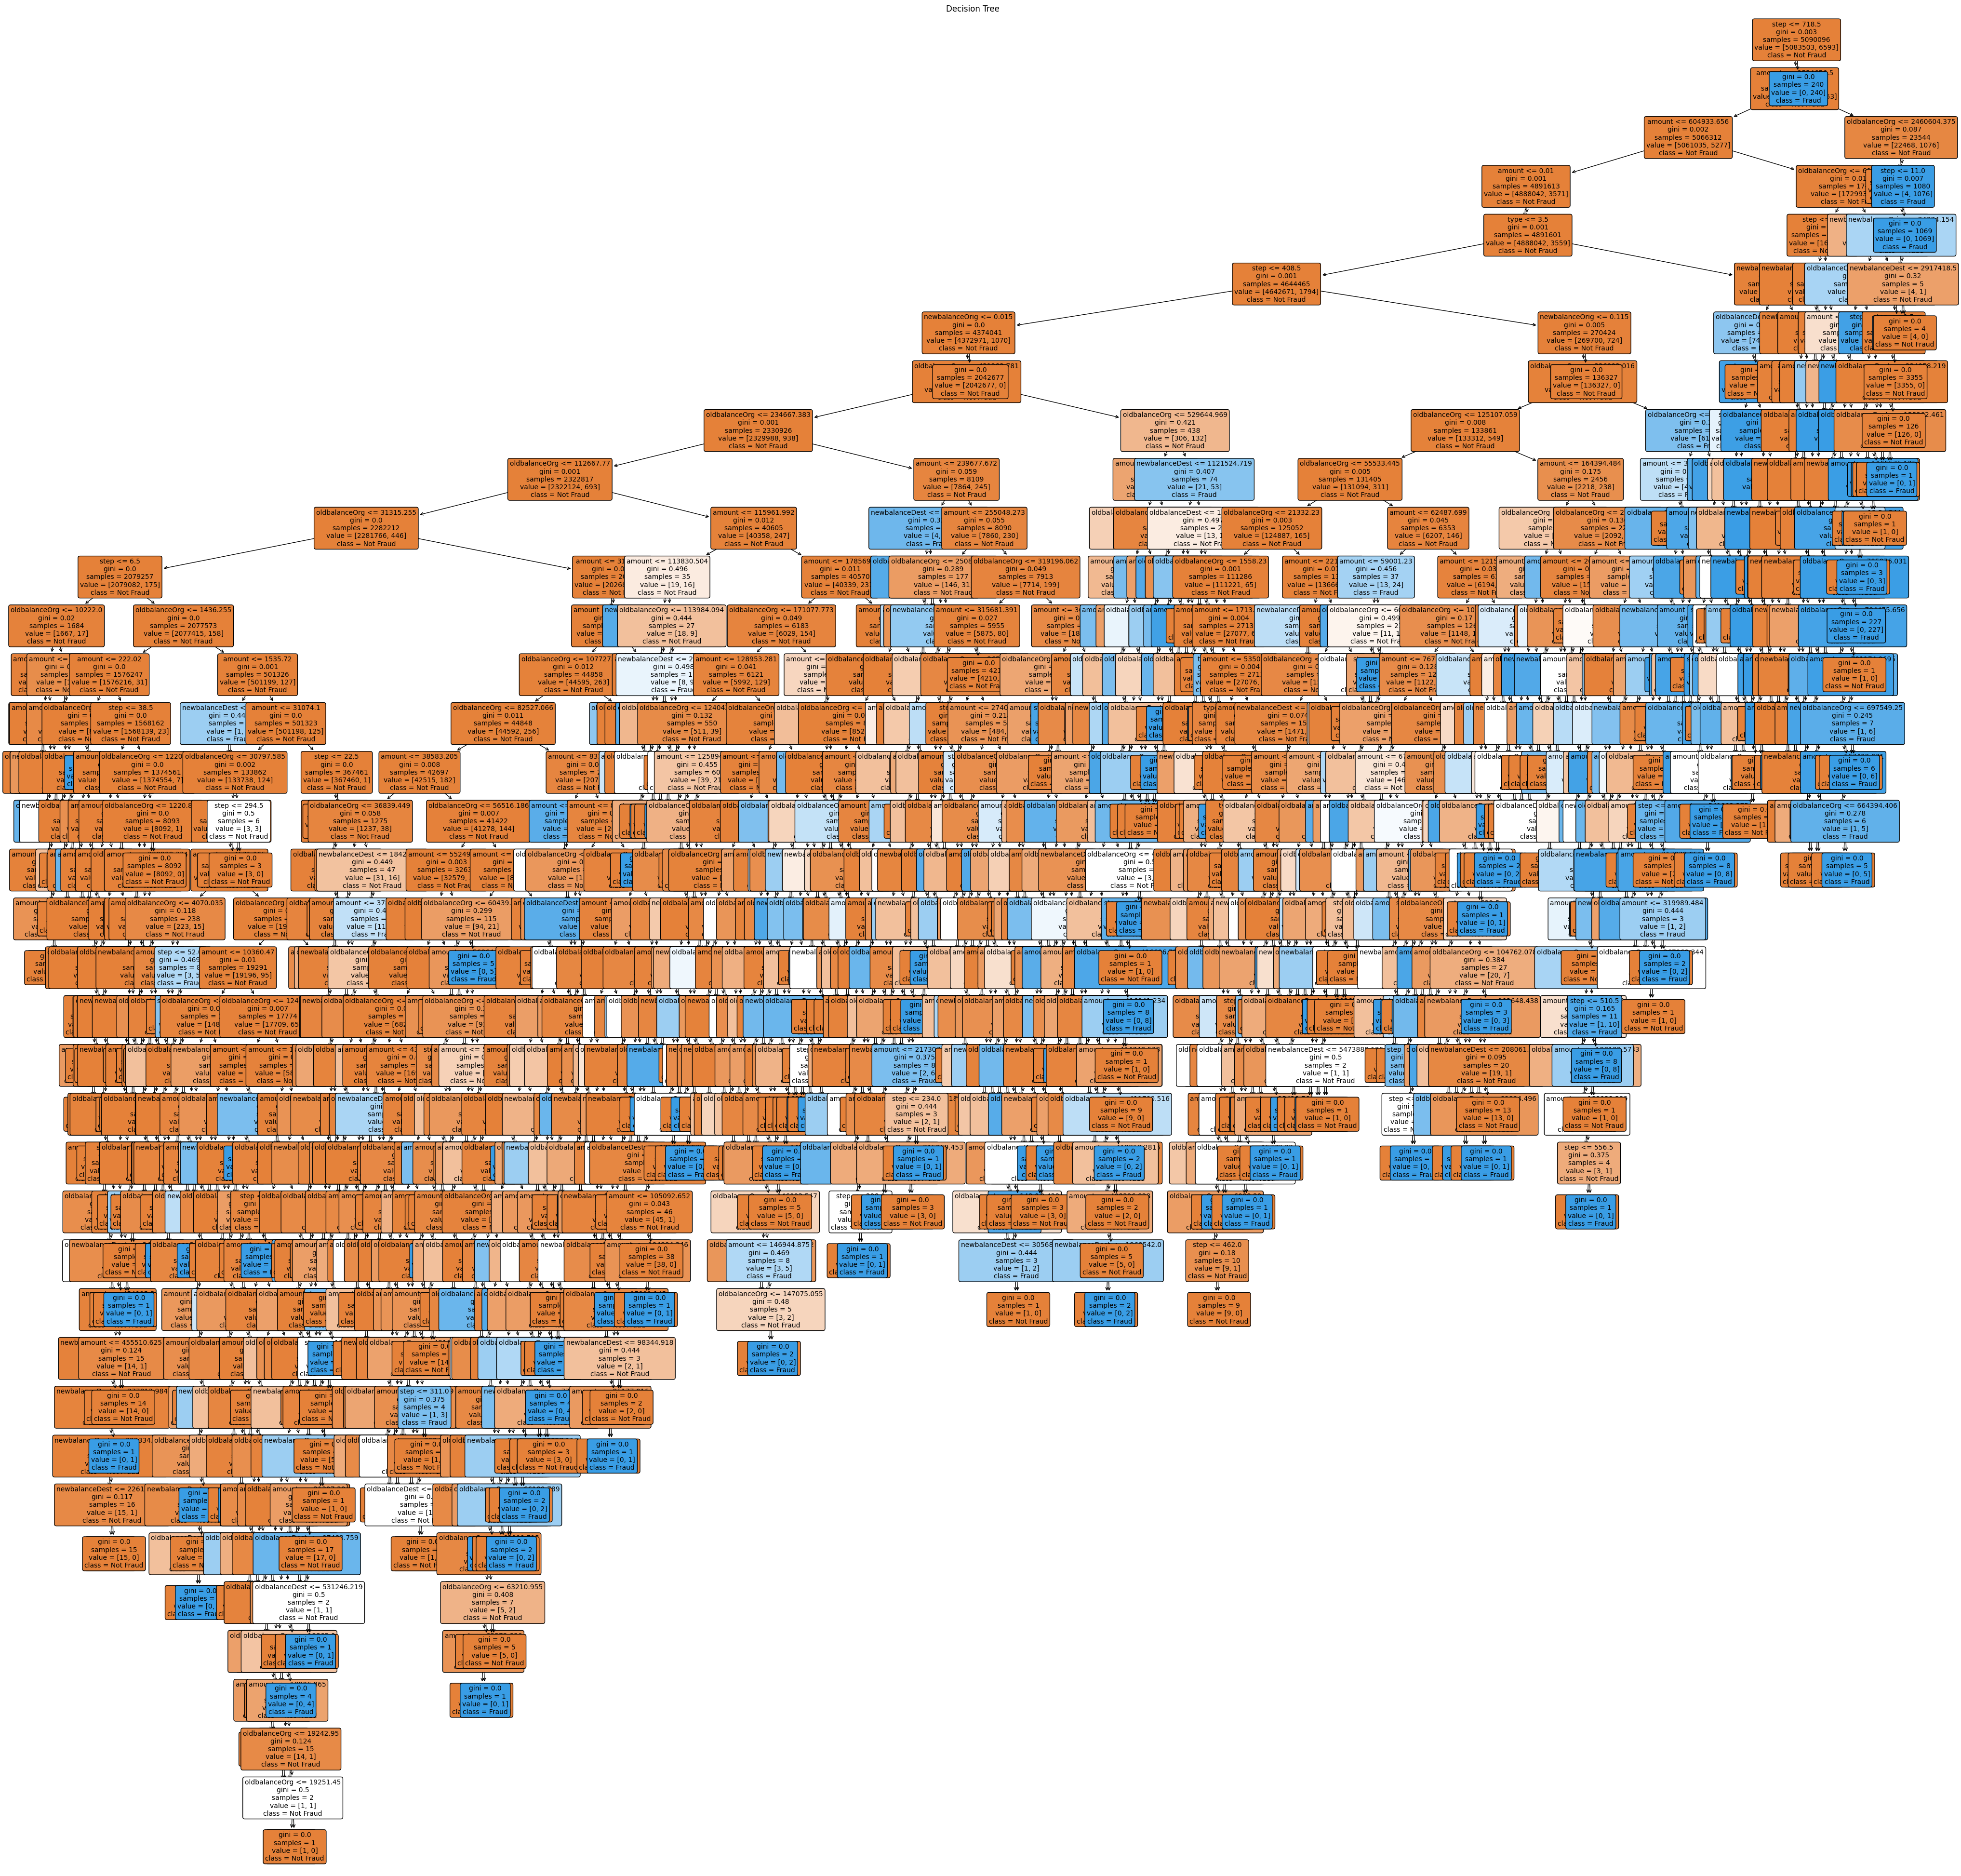

In [24]:
plt.figure(figsize=(50, 50))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['Not Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

In [25]:
##Smote

In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
X_train_final, X_eval, y_train_final, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [28]:
print(y_train_resampled.value_counts())
#print(df['isFraud'].value_counts())

isFraud
0    5083503
1    5083503
Name: count, dtype: int64


In [29]:
clf = LogisticRegression(random_state=42)

In [30]:
clf.fit(X_train_final,y_train_final)

LogisticRegression(random_state=42)

In [31]:
y_pred = clf.predict(X_eval)

In [32]:
accuracy = accuracy_score(y_eval,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [33]:
#Calculate precision
precision = precision_score(y_eval,y_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.92


In [34]:
recall = recall_score(y_eval,y_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.90


In [35]:
# Calculate F1-score
f1 = f1_score(y_eval,y_pred)
print(f'F1-score: {f1:.2f}')

F1-score: 0.91


In [36]:
confusion = confusion_matrix(y_eval,y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[934848  82180]
 [ 98316 918058]]


In [37]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_eval, y_pred)
fpr, tpr, _ = roc_curve(y_eval, y_pred)
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

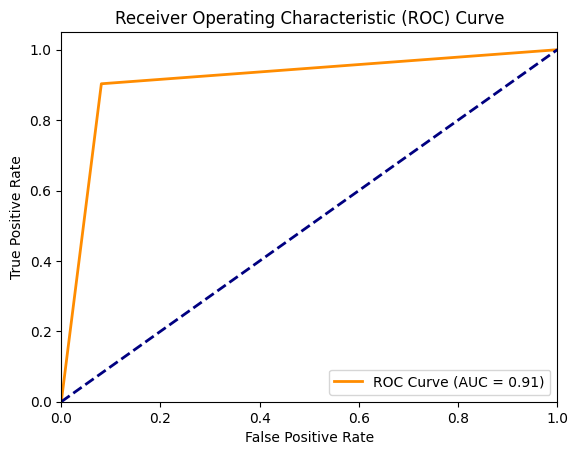

In [45]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Print ROC AUC score
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.91


In [41]:
# Count the number of frauds in the predicted labels
num_frauds_predicted = sum(y_pred == 1)

print(f'Number of frauds predicted: {num_frauds_predicted}')

Number of frauds predicted: 1000238


In [42]:
model_filename = 'logistic_regression_model.pkl'

In [43]:
joblib.dump(clf, model_filename)
print(f"Model saved as {model_filename}")

Model saved as logistic_regression_model.pkl


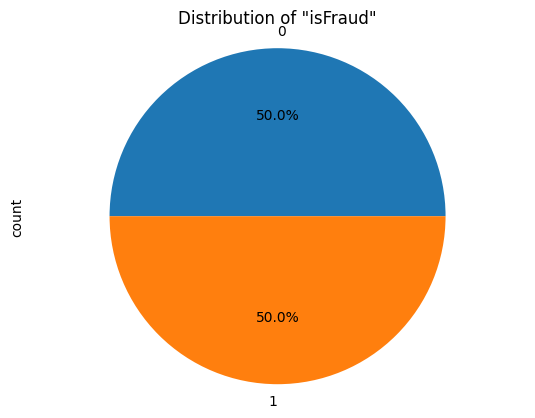

In [44]:
y_train_resampled.value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of "isFraud"')
plt.show()